## Ismet Okan Celik CWID: 10472265

## Question-1

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_model import ARIMA

Data=pd.read_csv('EE627A_HW2_Q2.csv',header=None)
Data

,0
0,0.8512
1,-2.0698
2,0.8185
3,-1.0678
4,2.3753
...,...
295,-1.2904
296,1.1051
297,1.1782
298,-0.0994


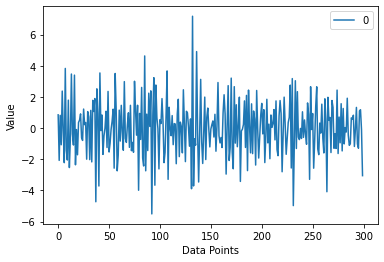

In [3]:
sns.lineplot(data=Data)
plt.xlabel('Data Points')
plt.ylabel('Value')
plt.show()

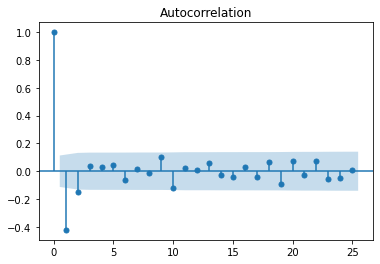

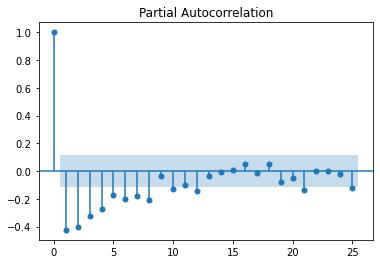

In [4]:
plot_acf(Data, lags=25);
plot_pacf(Data, lags=25);

#### a) False --> Because as we can see on the ACF graph AR(1) correlated with the AR(2)  
#### b) False --> Because as we can see on the graph of ACF coefficent cliff after l>=2

## Question-2

In [6]:
Data2=pd.read_csv('EE627A_HW2_Q3.csv',names=['Values'])
Data2

,Values
0,1.0374
1,1.0372
2,1.0372
3,1.0370
4,1.0369
...,...
1245,1.0515
1246,1.0511
1247,1.0515
1248,1.0534


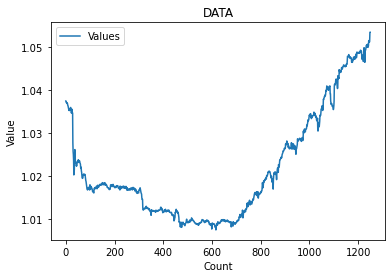

In [7]:
Data3 = sns.lineplot(data=Data2)
Data3.set_title('DATA')
Data3.set(xlabel='Count', ylabel='Value')
plt.show()

In [68]:
#Taking Difference in order to Make Stationary
difference1=Data2['Values'].diff(periods=1)
difference1=difference[1:]
difference1.head()

2    0.0000
3   -0.0002
4   -0.0001
5    0.0001
6   -0.0002
Name: Values, dtype: float64

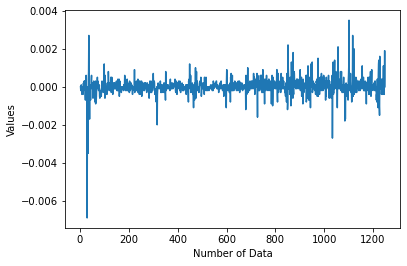

In [69]:
#Oylesine Deneme
sns.lineplot(data=difference1)
plt.xlabel('Number of Data')
plt.ylabel('Values')
plt.show()

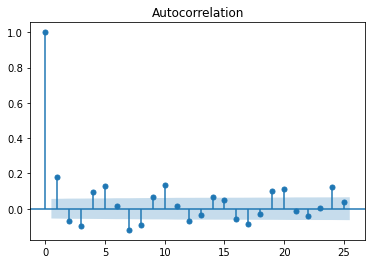

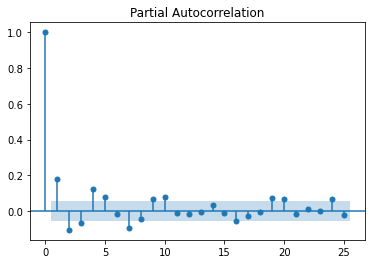

In [70]:
plot_acf(difference, lags=25);
plot_pacf(difference, lags=25);

In [83]:
Model_Q3_1= ARIMA(difference1, order=(4, 1, 4))
Model_Q3_1_fit =Model_Q3_1.fit()
Model_Q3_1_fit.summary()

C:\Users\okanc\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\okanc\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:1521: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D.Values   No. Observations:                 1247
Model:                 ARIMA(4, 1, 4)   Log Likelihood                7810.792
Method:                       css-mle   S.D. of innovations              0.000
Date:                Sun, 13 Feb 2022   AIC                         -15601.584
Time:                        22:19:39   BIC                         -15550.299
Sample:                             1   HQIC                        -15582.302
                                                                              
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const           3.306e-07   1.08e-06      0.307      0.759   -1.78e-06    2.44e-06
ar.L1.D.Values    -0.1881        nan        nan        nan         nan         nan
ar.L2.D.Values    -0.4177        nan        nan        nan         nan         nan
ar.L3.D.Values    -0.6601      0.133     -4.948      0.000      -0.922      -0.399
ar.L4.D.Values     0.1205      0.028      4.347      0.000       0.066       0.175
ma.L1.D.Values    -0.5473        nan        nan        nan         nan         nan
ma.L2.D.Values     0.0747        nan        nan        nan         nan         nan
ma.L3.D.Values     0.2242      0.173      1.297      0.195      -0.115       0.563
ma.L4.D.Values    -0.5762      0.109     -5.293      0.000      -0.790      -0.363
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.2753           -1.0289j            1.0651           -0.2084
AR.2            0.2753           +1.0289j            1.0651            0.2084
AR.3           -1.1948           -0.0000j            1.1948           -0.5000
AR.4            6.1200           -0.0000j            6.1200           -0.0000
MA.1            1.0778           -0.0000j            1.0778           -0.0000
MA.2            0.2761           -1.1052j            1.1392           -0.2110
MA.3            0.2761           +1.1052j            1.1392            0.2110
MA.4           -1.2408           -0.0000j            1.2408           -0.5000
-----------------------------------------------------------------------------
"""

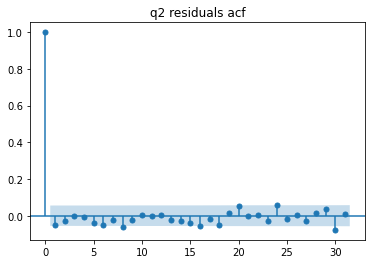

In [84]:
q2_residuals = pd.DataFrame(Model_Q3_1_fit.resid)
plot_acf(q2_residuals, title='q2 residuals acf')
plt.show()

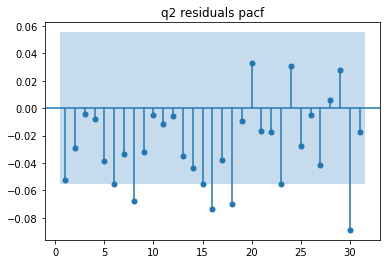

In [85]:
plot_pacf(q2_residuals, title='q2 residuals pacf', zero=False)
plt.show()

In [86]:
Model_Q3_2= ARIMA(difference1, order=(5, 1, 4))
Model_Q3_2_fit =Model_Q3_2.fit()
Model_Q3_2_fit.summary()

C:\Users\okanc\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\okanc\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D.Values   No. Observations:                 1247
Model:                 ARIMA(5, 1, 4)   Log Likelihood                7819.504
Method:                       css-mle   S.D. of innovations              0.000
Date:                Sun, 13 Feb 2022   AIC                         -15617.009
Time:                        22:19:59   BIC                         -15560.595
Sample:                             1   HQIC                        -15595.799
                                                                              
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const           3.181e-07   6.72e-07      0.474      0.636   -9.98e-07    1.63e-06
ar.L1.D.Values    -0.2645      0.041     -6.445      0.000      -0.345      -0.184
ar.L2.D.Values    -0.3589        nan        nan        nan         nan         nan
ar.L3.D.Values    -0.7099      0.181     -3.926      0.000      -1.064      -0.355
ar.L4.D.Values     0.0839      0.045      1.869      0.062      -0.004       0.172
ar.L5.D.Values     0.0221      0.021      1.057      0.290      -0.019       0.063
ma.L1.D.Values    -0.5475        nan        nan        nan         nan         nan
ma.L2.D.Values    -0.0429        nan        nan        nan         nan         nan
ma.L3.D.Values     0.3263      0.126      2.588      0.010       0.079       0.573
ma.L4.D.Values    -0.6223      0.206     -3.021      0.003      -1.026      -0.219
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.2953           -1.0302j            1.0717           -0.2056
AR.2            0.2953           +1.0302j            1.0717            0.2056
AR.3           -1.1455           -0.0000j            1.1455           -0.5000
AR.4            4.4651           -0.0000j            4.4651           -0.0000
AR.5           -7.7132           -0.0000j            7.7132           -0.5000
MA.1           -1.1474           -0.0000j            1.1474           -0.5000
MA.2            0.3111           -1.1124j            1.1551           -0.2066
MA.3            0.3111           +1.1124j            1.1551            0.2066
MA.4            1.0497           -0.0000j            1.0497           -0.0000
-----------------------------------------------------------------------------
"""

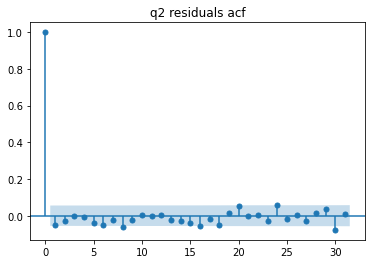

In [87]:
q2_residuals_2 = pd.DataFrame(Model_Q3_2_fit.resid)
plot_acf(q2_residuals, title='q2 residuals acf')
plt.show()

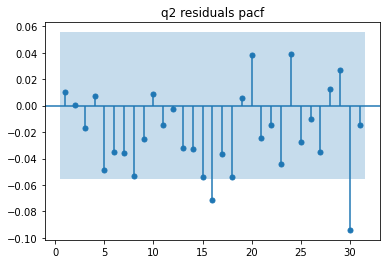

In [88]:
plot_pacf(q2_residuals_2, title='q2 residuals pacf', zero=False)
plt.show()

In [102]:
Model_Q3_3= ARIMA(difference1, order=(2, 1, 5))
Model_Q3_3_fit =Model_Q3_3.fit()
Model_Q3_3_fit.summary()

C:\Users\okanc\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:701: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\okanc\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:701: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\okanc\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:702: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\okanc\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:702: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\okanc\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:1521: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D.Values   No. Observations:                 1247
Model:                 ARIMA(2, 1, 5)   Log Likelihood                7825.407
Method:                       css-mle   S.D. of innovations              0.000
Date:                Sun, 13 Feb 2022   AIC                         -15632.815
Time:                        22:28:34   BIC                         -15586.658
Sample:                             1   HQIC                        -15615.461
                                                                              
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            2.71e-07    3.5e-07      0.773      0.439   -4.16e-07    9.58e-07
ar.L1.D.Values     0.5175      0.039     13.421      0.000       0.442       0.593
ar.L2.D.Values    -0.8260        nan        nan        nan         nan         nan
ma.L1.D.Values    -1.3184      0.050    -26.350      0.000      -1.417      -1.220
ma.L2.D.Values     1.0402        nan        nan        nan         nan         nan
ma.L3.D.Values    -0.6301        nan        nan        nan         nan         nan
ma.L4.D.Values     0.0286      0.019      1.478      0.140      -0.009       0.066
ma.L5.D.Values    -0.0862      0.013     -6.692      0.000      -0.112      -0.061
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.3133           -1.0548j            1.1003           -0.2041
AR.2            0.3133           +1.0548j            1.1003            0.2041
MA.1            1.0229           -0.0000j            1.0229           -0.0000
MA.2            0.3921           -1.1483j            1.2134           -0.1976
MA.3            0.3921           +1.1483j            1.2134            0.1976
MA.4           -0.7379           -2.6747j            2.7746           -0.2928
MA.5           -0.7379           +2.6747j            2.7746            0.2928
-----------------------------------------------------------------------------
"""

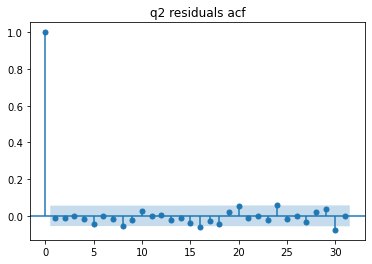

In [103]:
q2_residuals_3 = pd.DataFrame(Model_Q3_3_fit.resid)
plot_acf(q2_residuals_3, title='q2 residuals acf')
plt.show()

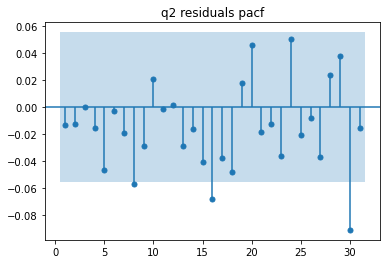

In [104]:
plot_pacf(q2_residuals_3, title='q2 residuals pacf', zero=False)
plt.show()